In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers.legacy import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [6]:
USE_GPU = False

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

NUM_CLASSES = 10
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)  

In [7]:
# input_layer = Input(shape=(32,32,3))

# conv_layer_1 = Conv2D(
#     filters = 10
#     , kernel_size = (4,4)
#     , strides = 2
#     , padding = 'same'
#     )(input_layer)

# conv_layer_2 = Conv2D(
#     filters = 20
#     , kernel_size = (3,3)
#     , strides = 2
#     , padding = 'same'
#     )(conv_layer_1)

# flatten_layer = Flatten()(conv_layer_2)

# output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

# model = Model(input_layer, output_layer)

input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [9]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
if USE_GPU:
    model.fit(x_train, y_train, batch_size=1024, epochs=10, shuffle=True,
              validation_data=(x_test, y_test))
else:
    with tf.device('/device:CPU:0'):
        model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10


2023-07-06 18:21:01.134283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1562/1563 [============================>.] - ETA: 0s - loss: 1.5455 - accuracy: 0.4599

2023-07-06 18:21:36.568649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 38s 24ms/step - loss: 1.5454 - accuracy: 0.4600 - val_loss: 1.2121 - val_accuracy: 0.5693
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1371 - accuracy: 0.5986 - val_loss: 1.2192 - val_accuracy: 0.5789
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9923 - accuracy: 0.6529 - val_loss: 1.1974 - val_accuracy: 0.5880
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9091 - accuracy: 0.6822 - val_loss: 1.1722 - val_accuracy: 0.5884
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8538 - accuracy: 0.7062 - val_loss: 0.8368 - val_accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7992 - accuracy: 0.7219 - val_loss: 0.8793 - val_accuracy: 0.6976
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7613 - accuracy: 0.7358 - val_loss: 0.8008 - val_accura

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

2023-07-06 18:28:09.729592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 18ms/step - loss: 0.8220 - accuracy: 0.7216


[0.8219643831253052, 0.7215999960899353]

2023-07-06 18:28:10.575388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


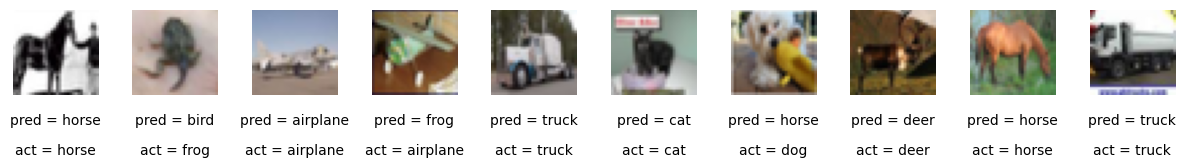

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'pred = {preds_single[idx]}',
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f'act = {actual_single[idx]}',
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)